# Plot RA summary data from overlap analysis

Julia M. Gauglitz

Date: 5/27/2020

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Plot styling.
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='sans-serif')
sns.set_context('paper', font_scale=1.7)

In [3]:
df_diet = (pd.read_csv('../data/ra_intervention_ratio_plasma_level5_1.csv')
           .sort_values('diff'))

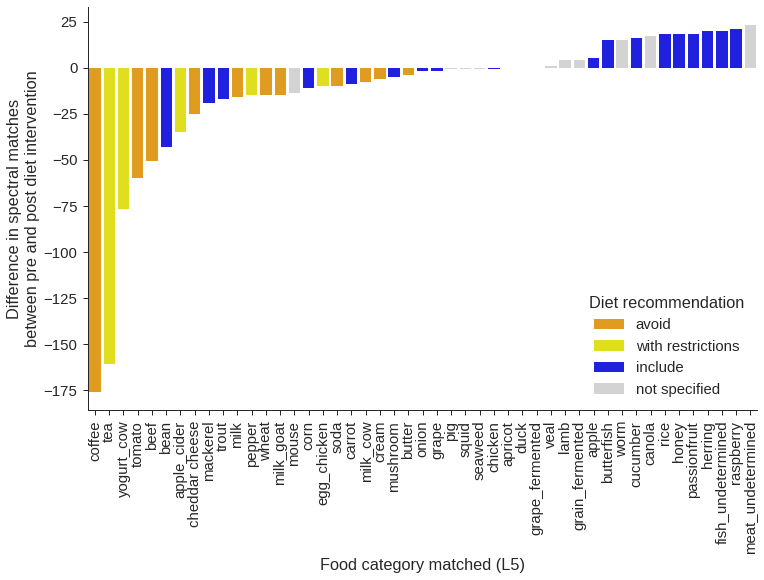

In [4]:
width = 12
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

sns.barplot(
    x='food_level_5', y='diff', hue='diet_recommendation', data=df_diet,
    palette={'not specified': 'lightgray', 'avoid': 'orange',
             'include': 'blue', 'with restrictions': 'yellow'},
    dodge=False, ax=ax)

ax.set_xlabel('Food category matched (L5)')
ax.set_ylabel('Difference in spectral matches\n'
              'between pre and post diet intervention')

ax.legend(loc='lower right', frameon=False, title='Diet recommendation')
ax.xaxis.set_tick_params(rotation=90)

sns.despine()

plt.savefig('fig3a_dietary_recommendation.svg', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

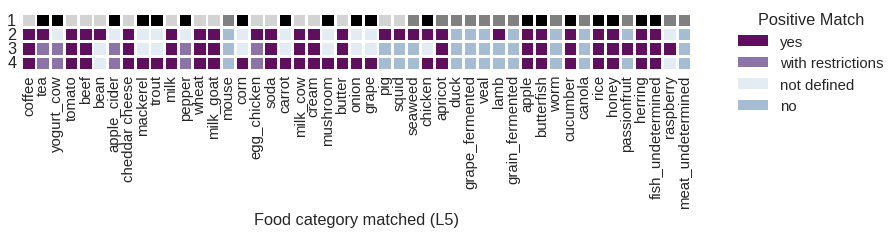

In [5]:
fig, axes = plt.subplots(4, 1, True, True, figsize=(12, 1))

palette = {'yes': '#6e016b', 'yeah': '#8c6bb1', 'not defined': '#9ebcda',
           'no': '#e0ecf4'}

# Change in microbial sources after diet intervention matches MS data.
sns.barplot(
    x='food_level_5', y='bar', hue='diet_diary_direction', data=df_diet,
    palette={'decrease': 'lightgray', 'constant': 'gray',
             'increase': 'black', 'not specified': 'gray'},
    dodge=False, ax=axes[0])

# MS data matches diet record.
sns.barplot(
    x='food_level_5', y='bar', hue='MS correlates to diet record',
    data=df_diet, palette=palette, dodge=False, ax=axes[1])

# MS data matches diet recommendation.
sns.barplot(
    x='food_level_5', y='bar', hue='MS correlates to diet recommendation',
    data=df_diet, palette=palette, dodge=False, ax=axes[2])

# Diet record matches diet recommendation.
sns.barplot(
    x='food_level_5', y='bar',
    hue='diet record correlates to diet recommendation', data=df_diet,
    palette=palette, dodge=False, ax=axes[3])

for i, ax in enumerate(axes, 1):
    ax.set_xlabel('')
    ax.set_ylabel(i, rotation=0, labelpad=10, verticalalignment='center')
    ax.set_yticks([])
    ax.xaxis.set_tick_params(length=0)
axes[-1].set_xlabel('Food category matched (L5)')
axes[-1].xaxis.set_tick_params(rotation=90)

for ax in axes[:-1]:
    ax.get_legend().remove()
handles, _ = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, ['yes', 'with restrictions', 'not defined', 'no'],
                loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False,
                title='Positive Match')

sns.despine(left=True, bottom=True)

plt.savefig('f3b_dietary_recommendation_match.svg', dpi=300,
            bbox_inches='tight')
plt.show()
plt.close()